### Netflix Data analysis

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('netflix_titles.csv')
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## Data Exploration

In [3]:
data.shape

(8807, 12)

In [4]:
data['release_year'].dtype

dtype('int64')

In [5]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data['country'].unique()[:5]

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'],
      dtype=object)

In [7]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

## Data Cleaning

In [5]:
df = data.dropna()
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
# We used the copy method to keep the original data safe.
# Then remove extra space from date column.
# convert date to datetime
# Created a new column containing only year

df = df.copy()  
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


In [15]:
df.head(1)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021


In [9]:
df['type'].value_counts()

type
Movie      5185
TV Show     147
Name: count, dtype: int64

In [10]:
df['country'].value_counts().head()

country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Name: count, dtype: int64

In [11]:
df.drop('date_added', axis=1, inplace=True) # remove a column parmanents

In [14]:
df.head(1)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021


In [16]:
release_show = df[df['release_year'] > 2020].head(1) # after release movies 2020
release_show

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021


In [25]:
df['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
# We changed the rating column to age group

def simplify_rating(rating):
    mapping = {
        'TV-Y': 'Kids',
        'TV-G': 'Kids',
        'G': 'Kids',
        'TV-Y7': 'Kids 7+',
        'TV-Y7-FV': 'Kids 7+',
        'PG': 'Family',
        'TV-PG': 'Family',
        'PG-13': 'Teen',
        'TV-14': 'Mature 16+',
        'R': 'Mature 16+',
        'TV-MA': 'Adult',
        'NC-17': 'Adult',
        'NR': 'Unrated',
        'UR': 'Unrated'
    }
    return mapping.get(rating, 'Unknown')

df['age_group'] = df['rating'].apply(simplify_rating)


In [19]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,age_group
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,Adult
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,Mature 16+


In [20]:
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1

In [22]:
df.head(1)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,age_group
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,Adult


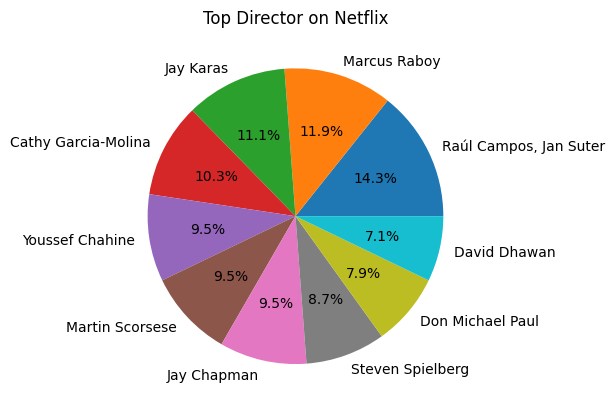

In [145]:
# I have Creat a pie chart in this there are more movies by the director.
top_10_director_movies = df['director'].value_counts().head(10)
plt.pie(top_10_director_movies.values, labels=top_10_director_movies.index,autopct='%1.1f%%')
plt.title('Top Director on Netflix')
plt.show()

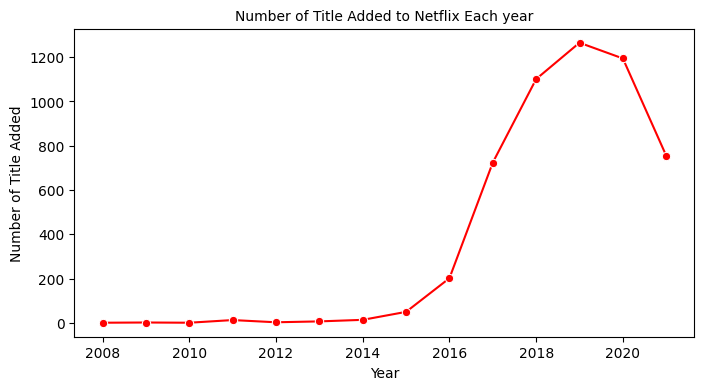

In [119]:
# Which years has the most movies released on netflix ?
content_by_year = df['year_added'].value_counts()
plt.figure(figsize=(8,4))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o', color='red')
plt.title('Number of Title Added to Netflix Each year', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Number of Title Added')
plt.show()


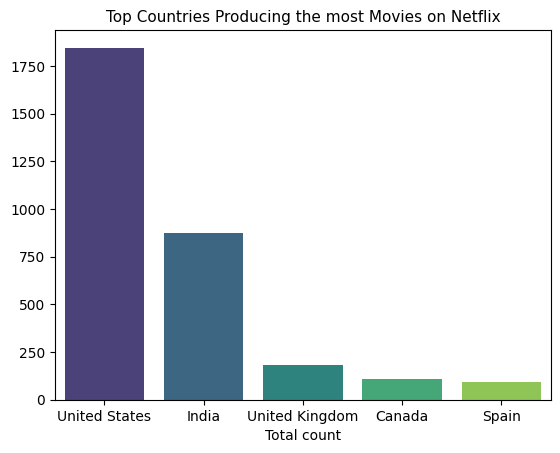

In [126]:
# Top 5 Which country has the most movies onn netflix ?
top_country_movies = df['country'].value_counts().head(5).sort_values(ascending=False)
sns.barplot(x=top_country_movies.index , y= top_country_movies.values, palette='viridis')
plt.title('Top Countries Producing the most Movies on Netflix', fontsize=11)
plt.xlabel('Total count')
plt.show()

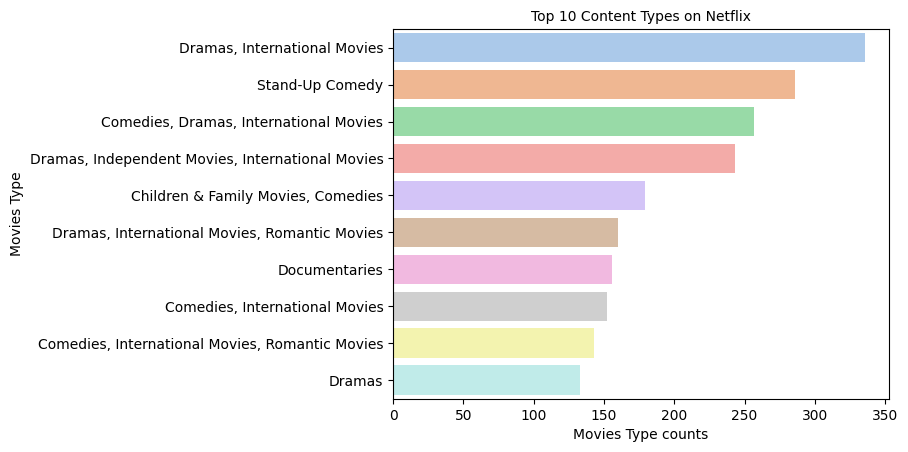

In [124]:
# What type of movies are most on Netflix ?
movies_type = df['listed_in'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=movies_type.values, y=movies_type.index, palette='pastel')
plt.title('Top 10 Content Types on Netflix',fontsize=10)
plt.xlabel('Movies Type counts')
plt.ylabel('Movies Type')
plt.show()

In [ ]:
plt.